### Custom Canny Edge Detector

In [27]:
import numpy as np
import os
import cv2
%pylab inline
import matplotlib.pyplot as plt

Populating the interactive namespace from numpy and matplotlib


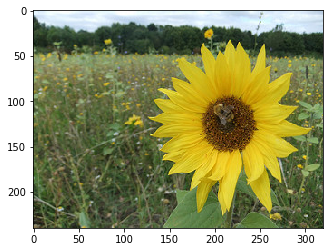

In [3]:
def see_input(path=None):
    pic = plt.imread(path)
    plt.imshow(pic)
    
img = 'sunflower.jpg'
see_input(img)
plt.show()

In [29]:
def Canny_detector(img, weak_th=None, strong_th=None):
    img = cv2.imread(img)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)    
    img=cv2.GaussianBlur(img,(5,5),1.2) #reducing noise
    gx = cv2.Sobel(np.float32(img), cv2.CV_64F, 1, 0,3)
    gy = cv2.Sobel(np.float32(img), cv2.CV_64F, 0, 1,3)
    mag, ang = cv2.cartToPolar(gx, gy,angleInDegrees=True)
    mag_max=np.max(mag)
    if not weak_th:weak_th=mag_max*0.1
    if not strong_th:strong_th=mag_max*0.5   
    height,width=img.shape
    for i_x in range(width):
        for i_y in range(height):
            
            grad_ang=ang[i_y,i_x]
            grad_ang=abs(grad_ang-180) if abs(grad_ang)>180 else abs(grad_ang)
            
            #selecting the neigbours of the target pixel according to the gradient direction
            if grad_ang<=22.5:
                neighb_1_x,neighb_1_y=i_x-1,i_y
                neighb_2_x,neighb_2_y=i_x+1,i_y
            elif grad_ang>22.5 and grad_ang<=(22.5+45):
                neighb_1_x,neighb_1_y=i_x-1,i_y-1
                neighb_2_x,neighb_2_y=i_x+1,i_y+1
            elif grad_ang>(22.5+45) and grad_ang<=(22.5+90):
                neighb_1_x,neighb_1_y=i_x,i_y-1
                neighb_2_x,neighb_2_y=i_x,i_y+1
            elif grad_ang>(22.5+90) and grad_ang<=(22.5+135):
                neighb_1_x,neighb_1_y=i_x-1,i_y+1
                neighb_2_x,neighb_2_y=i_x+1,i_y-1
            elif grad_ang>(22.5+135) and grad_ang<=(22.5+180):
                neighb_1_x,neighb_1_y=i_x-1,i_y
                neighb_2_x,neighb_2_y=i_x+1,i_y
            
            #Non-maximum supression step
            if width>neighb_1_x>=0 and height>neighb_1_y>=0:
                if mag[i_y,i_x]<mag[neighb_1_y,neighb_1_x]:
                    mag[i_y,i_x]=0
                    continue

            if width>neighb_2_x>=0 and height>neighb_2_y>=0:
                if mag[i_y,i_x]<mag[neighb_2_y,neighb_2_x]:
                    mag[i_y,i_x]=0

    weak_ids=zeros_like(img)
    strong_ids=zeros_like(img)              
    ids=zeros_like(img)
    
    #double thresholding step
    for i_x in range(width):
        for i_y in range(height):
            grad_mag=mag[i_y,i_x]
            if grad_mag<weak_th:
                mag[i_y,i_x]=0
            elif strong_th>grad_mag>=weak_th:
                ids[i_y,i_x]=1
            else:
                ids[i_y,i_x]=2
    
    
    
    return mag

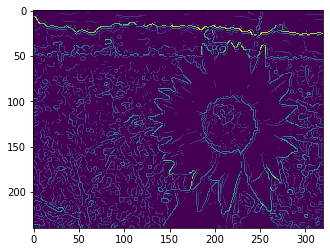

In [30]:
canny_img = Canny_detector(img)
plt.imshow(canny_img)
plt.show()

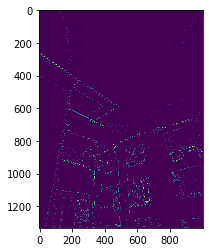

In [31]:
img = "building.jpg"
canny_img = Canny_detector(img)
plt.imshow(canny_img)
plt.show()